In [1]:
import numpy as np
import pandas as pd
from functools import reduce
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import scanpy as sc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

In [2]:
#READ IN RAW COUNTS

counts_df_1 = pd.read_csv(r"C:\Users\nr\OneDrive\Desktop\BF550\project2Data\GSM3746212_Muscle_1_Counts.csv.gz")
counts_df_2 = pd.read_csv(r"C:\Users\nr\OneDrive\Desktop\BF550\project2Data\GSM3746213_Muscle_2_Counts.csv.gz")
counts_df_3 = pd.read_csv(r"C:\Users\nr\OneDrive\Desktop\BF550\project2Data\GSM3746214_Muscle_3_Counts.csv.gz")
counts_df_4 = pd.read_csv(r"C:\Users\nr\OneDrive\Desktop\BF550\project2Data\GSM3746215_Muscle_4_Counts.csv.gz")

In [3]:
#MERGE COUNTS DATA

data_frames = [counts_df_1, counts_df_2, counts_df_3, counts_df_4]
counts_df_1.set_index('Unnamed: 0', inplace=True)
counts_df_2.set_index('Unnamed: 0', inplace=True)
counts_df_3.set_index('Unnamed: 0', inplace=True)
counts_df_4.set_index('Unnamed: 0', inplace=True)

df_merged_test = reduce(lambda  left,right: pd.merge(left,right,on=['Unnamed: 0'],
                                            how='outer'), data_frames).dropna()
df_merged_test_T = df_merged_test.T

In [4]:
#SAVE COUNTS DATA

genes_to_keep_test = df_merged_test_T 

In [27]:
#LABEL MAPPINGS

marker_genes_dict = {
    'Endothelial Cells: 0': ['CD74', 'VWF', 'IFI27'],
    'LUM + FAP Cells': ['APOD', 'LUM', 'DCN'],
    'Endothelial Cells: 1': ['CD36', 'ITGA4', 'AMD1'],
    'Satellite Cells': ['APOC1', 'MYF5', 'RGS5'],
    'Pericytes': ['RGS5', 'NDUFA4L2', 'HIGD1B'],
    'FBN1 + FAP Cells': ['FBN1', 'CFD', 'DPT'],
    'PVC Endothelial Cells': ['DARC', "CCL14", 'PLAT'],
    'NK Cells': ['CCL4', 'NKG7', 'GNLY'],
    'Smooth Muscle Cells': ['MYH11', "RERGL", "PLN"],
    'T + B Cells': ['MS4A1', 'CD3D', 'TCL1A'],
    'Myeloid Cells': ['LST1', 'LYZ', 'AIF1'],
}
    

In [6]:
#DATA PROCESSING

adata = sc.AnnData(genes_to_keep_test)

sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.pp.pca(adata, n_comps=10)
sc.pp.neighbors(adata, use_rep='X_pca', n_pcs=10)

C:\Users\nr\anasetup\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'Clustering of Cell Types'}, xlabel='tSNE1', ylabel='tSNE2'>

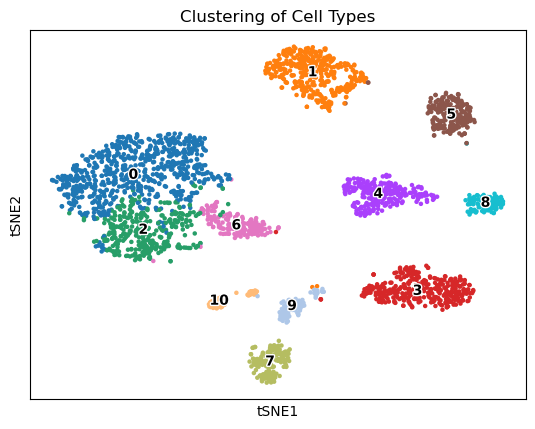

In [28]:
#UNLABELED CLUSTERS

sc.tl.louvain(adata, key_added='Cell Type', resolution=0.6)
sc.tl.tsne(adata)
sc.pl.tsne(adata, color='Cell Type', legend_loc='on data', title = "Clustering of Cell Types", legend_fontsize=10, legend_fontoutline=2, show = False)

categories: 0, 1, 2, etc.
var_group_labels: Endothelial Cells: 0, LUM + FAP Cells, Endothelial Cells: 1, etc.


C:\Users\nr\anasetup\Lib\site-packages\scanpy\plotting\_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


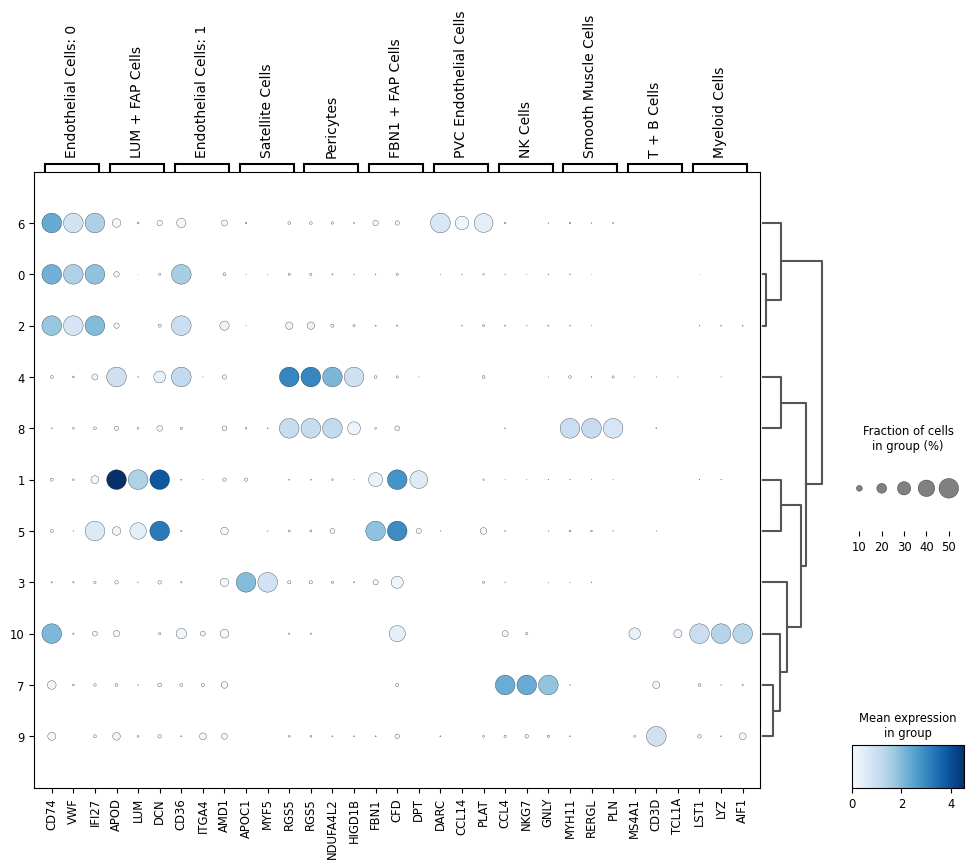

In [29]:
#CREATE DOT PLOT USED TO ID CLUSTER CELL TYPES

sc.tl.dendrogram(adata, groupby='Cell Type', key_added='dendrogram_Clusters')
sc.pl.dotplot(adata, marker_genes_dict, 'Cell Type', dendrogram=True, figsize=(12, 8), show=True, color_map='Blues', dot_max = 0.5)

In [30]:
cluster2annotation = {
     '0': 'Endothelial Cells: 0',
     '1': 'LUM + FAP Cells',
     '2': 'Endothelial Cells: 1',
     '3': 'Satellite Cells',
     '4': 'Pericytes',
     '5': 'FBN1 + FAP Cells',
     '6': 'PVC Endothelial Cells',
     '7': 'NK Cells',
     '8': 'Smooth Muscle Cells',
     '9': 'T + B Cells',
    '10': 'Myeloid Cells'
}


In [31]:
#CREATE LABELS

adata.obs['cell type'] = adata.obs['Cell Type'].map(cluster2annotation).astype('category')

C:\Users\nr\anasetup\Lib\site-packages\scanpy\plotting\_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


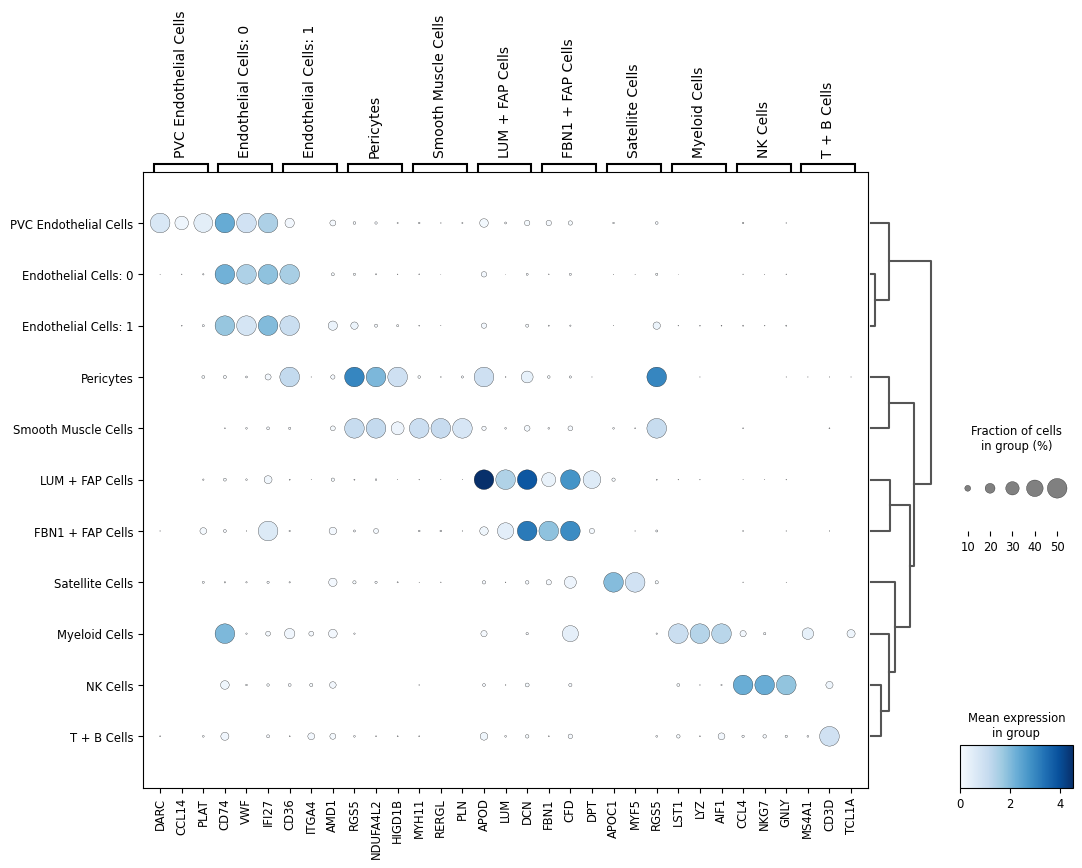

In [34]:
#ORDER DOTPLOT-- MATCHES FIGURE 2C

sc.tl.dendrogram(adata, groupby='cell type', key_added='dendrogram_Clusters')
sc.pl.dotplot(adata, marker_genes_dict, groupby='cell type', dendrogram='dendrogram_Clusters', figsize=(12, 8), show=True, color_map='Blues', dot_max = 0.5)

C:\Users\nr\anasetup\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


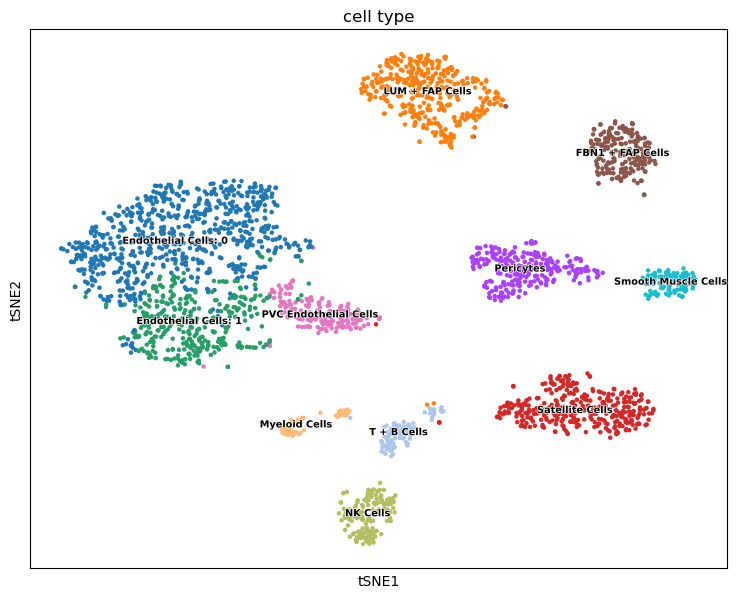

In [14]:
#LABELED CLUSTERS-- MATCHES FIGURE 2A

sc.pl.tsne(adata, color='cell type', legend_loc='on data', legend_fontsize=7, legend_fontoutline=1, show = False)
plt.gcf().set_size_inches(9, 7)

In [15]:
#CREATE MAPPINGS FOR MARKER GENES

marker_genes_dict_heatmap = {
    'PVC Endothelial Cells': ['DARC', 'CCL14', 'PLVAP'],
    'Endothelial Cells': ['VWF', 'FABP4', "IFI27"],
    'NK Cells': ['CCL4', 'NKG7', 'GNLY'],
    'PRG4 + FAP Cells': ['FBN1','PRG4','PCOLCE2'],
    'B cells': ['MS4A1', "TCL1A", 'FCRL1'],
    'LUM + FAP Cells': ['APOD', 'LUM', 'DCN'],   
    'Smooth Muscle Cells': ['MYH11', 'PLN', 'RERGL'],
    'Pericytes': ['RGS5', 'NDUFA4L2', 'HIGD1B'],
    'Satellite Cells': ['APOC1', 'APOE', 'MYF5'],
    'Myeloid Cells': ['LST1', 'LYZ', 'AIF1'],
    'T Cells': ['CD3D', 'LTB', 'CD52']    
}
    

cluster2annotation_heatmap = {
     '0': 'Satellite Cells',
     '1': 'Endothelial Cells',
     '2': 'B Cells',
     '3': 'PRG4 + FAP Cells',
     '4': 'PVC Endothelial Cells',
     '5': 'Smooth Muscle Cells',
     '6': 'NK Cells',
     '7': 'Pericytes',
     '8': 'Myeloid cells',
     '9': 'T Cells',
    '10': 'LUM + FAP Cells'
}

In [16]:
#CREATE LABELS

adata.obs['cell type heatmap'] = adata.obs['Cell Type'].map(cluster2annotation_heatmap).astype('category')

AnnData object with n_obs × n_vars = 2876 × 15406
    obs: 'Cell Type', 'cell type'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'louvain', 'tsne', 'Cell Type_colors', 'dendrogram_Clusters', 'dendrogram_Cell Type', 'cell type_colors'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


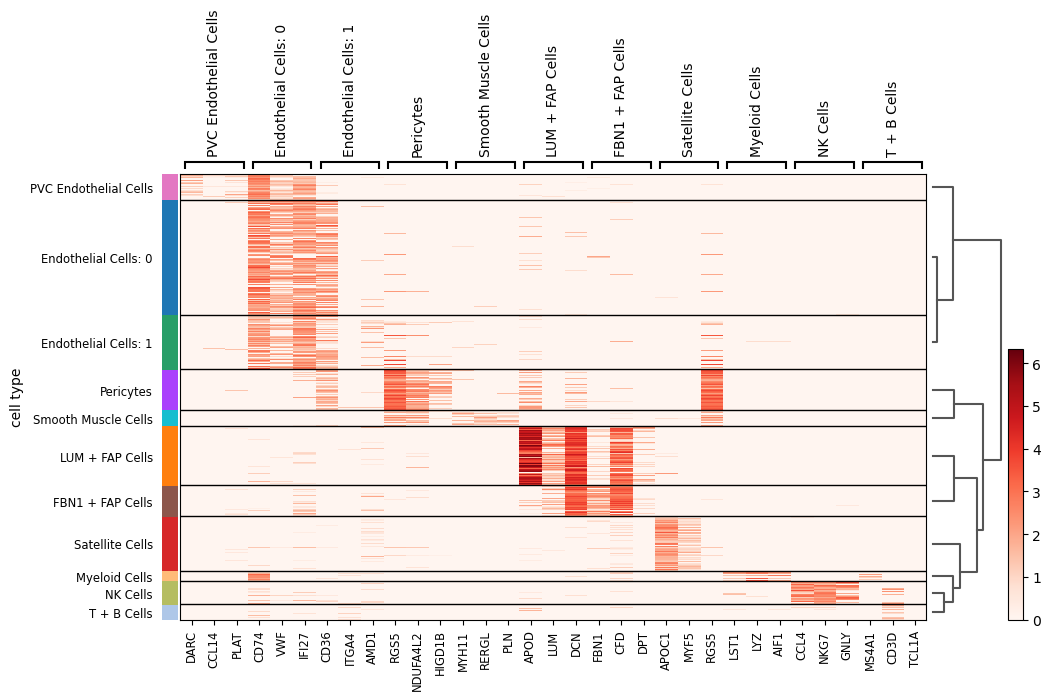

In [35]:
#PLOT HEATMAP-- MATCHES FIGURE 3A

sc.pl.heatmap(adata, marker_genes_dict, groupby='cell type', cmap='Reds', dendrogram=True)